In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

import warnings
warnings.simplefilter(action='ignore')

print("All dependencies are imported.")

All dependencies are imported.


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
car_dataset_2 = pd.read_csv("car data-set2.csv")

In [5]:
car_dataset_2.head()  # Original Data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [24]:
dataSet = pd.DataFrame(car_dataset_2)
dataSet.dropna(inplace= True)
Year = dataSet.Year
Age= 2019 * (np.ones(dataSet.Year.size)) - Year
dataSet.drop(['Car_Name'], axis=1, inplace= True)
dataSet.drop(['Year'], axis=1, inplace= True)
dataSet.insert(0, 'Age', Age)

In [25]:
dataSet.head() # Filtered Data

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5.0,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6.0,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2.0,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8.0,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5.0,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [26]:
dataSet.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5.0,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6.0,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2.0,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8.0,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5.0,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [27]:
dataSet.shape

(301, 8)

In [28]:
dataSet.columns

Index(['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [29]:
dataSet["Seller_Type"].unique()

array(['Dealer', 'Individual'], dtype=object)

In [30]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            301 non-null    float64
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 18.9+ KB


In [31]:
dataSet.columns

Index(['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

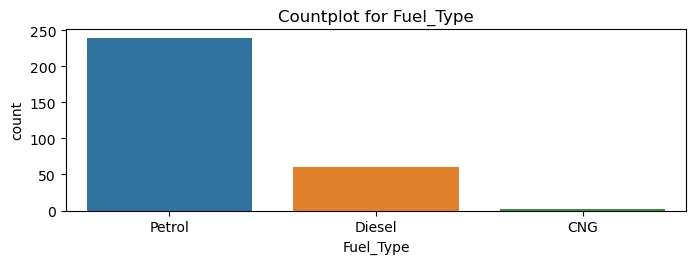

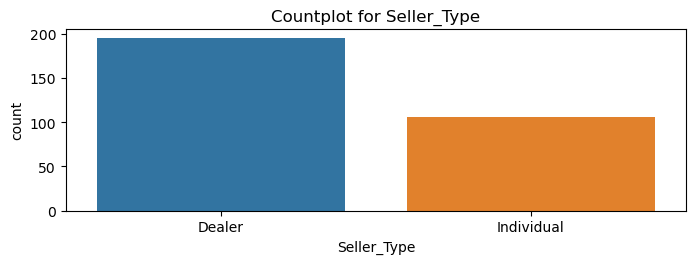

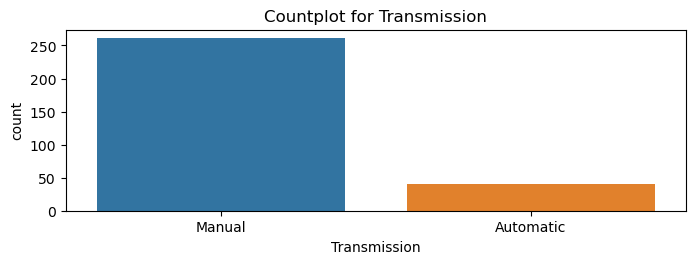

In [32]:
def plot_object_columns(df):
    # Get column names
    column_names = df.columns.to_list()

    # Create a list to store the column names having Object as Dtype
    object_list = [column_name for column_name in column_names if df[column_name].dtype == 'O']

    # Iterate through the object columns and plot count plots
    for i, column_name in enumerate(object_list, 1):
        plt.figure(figsize=(8, 8))
        plt.subplot(len(object_list), 1, i)
        sns.countplot(x=df[column_name], data=df)
        plt.title(f'Countplot for {column_name}')
        plt.show()

# Example usage:
plot_object_columns(dataSet)

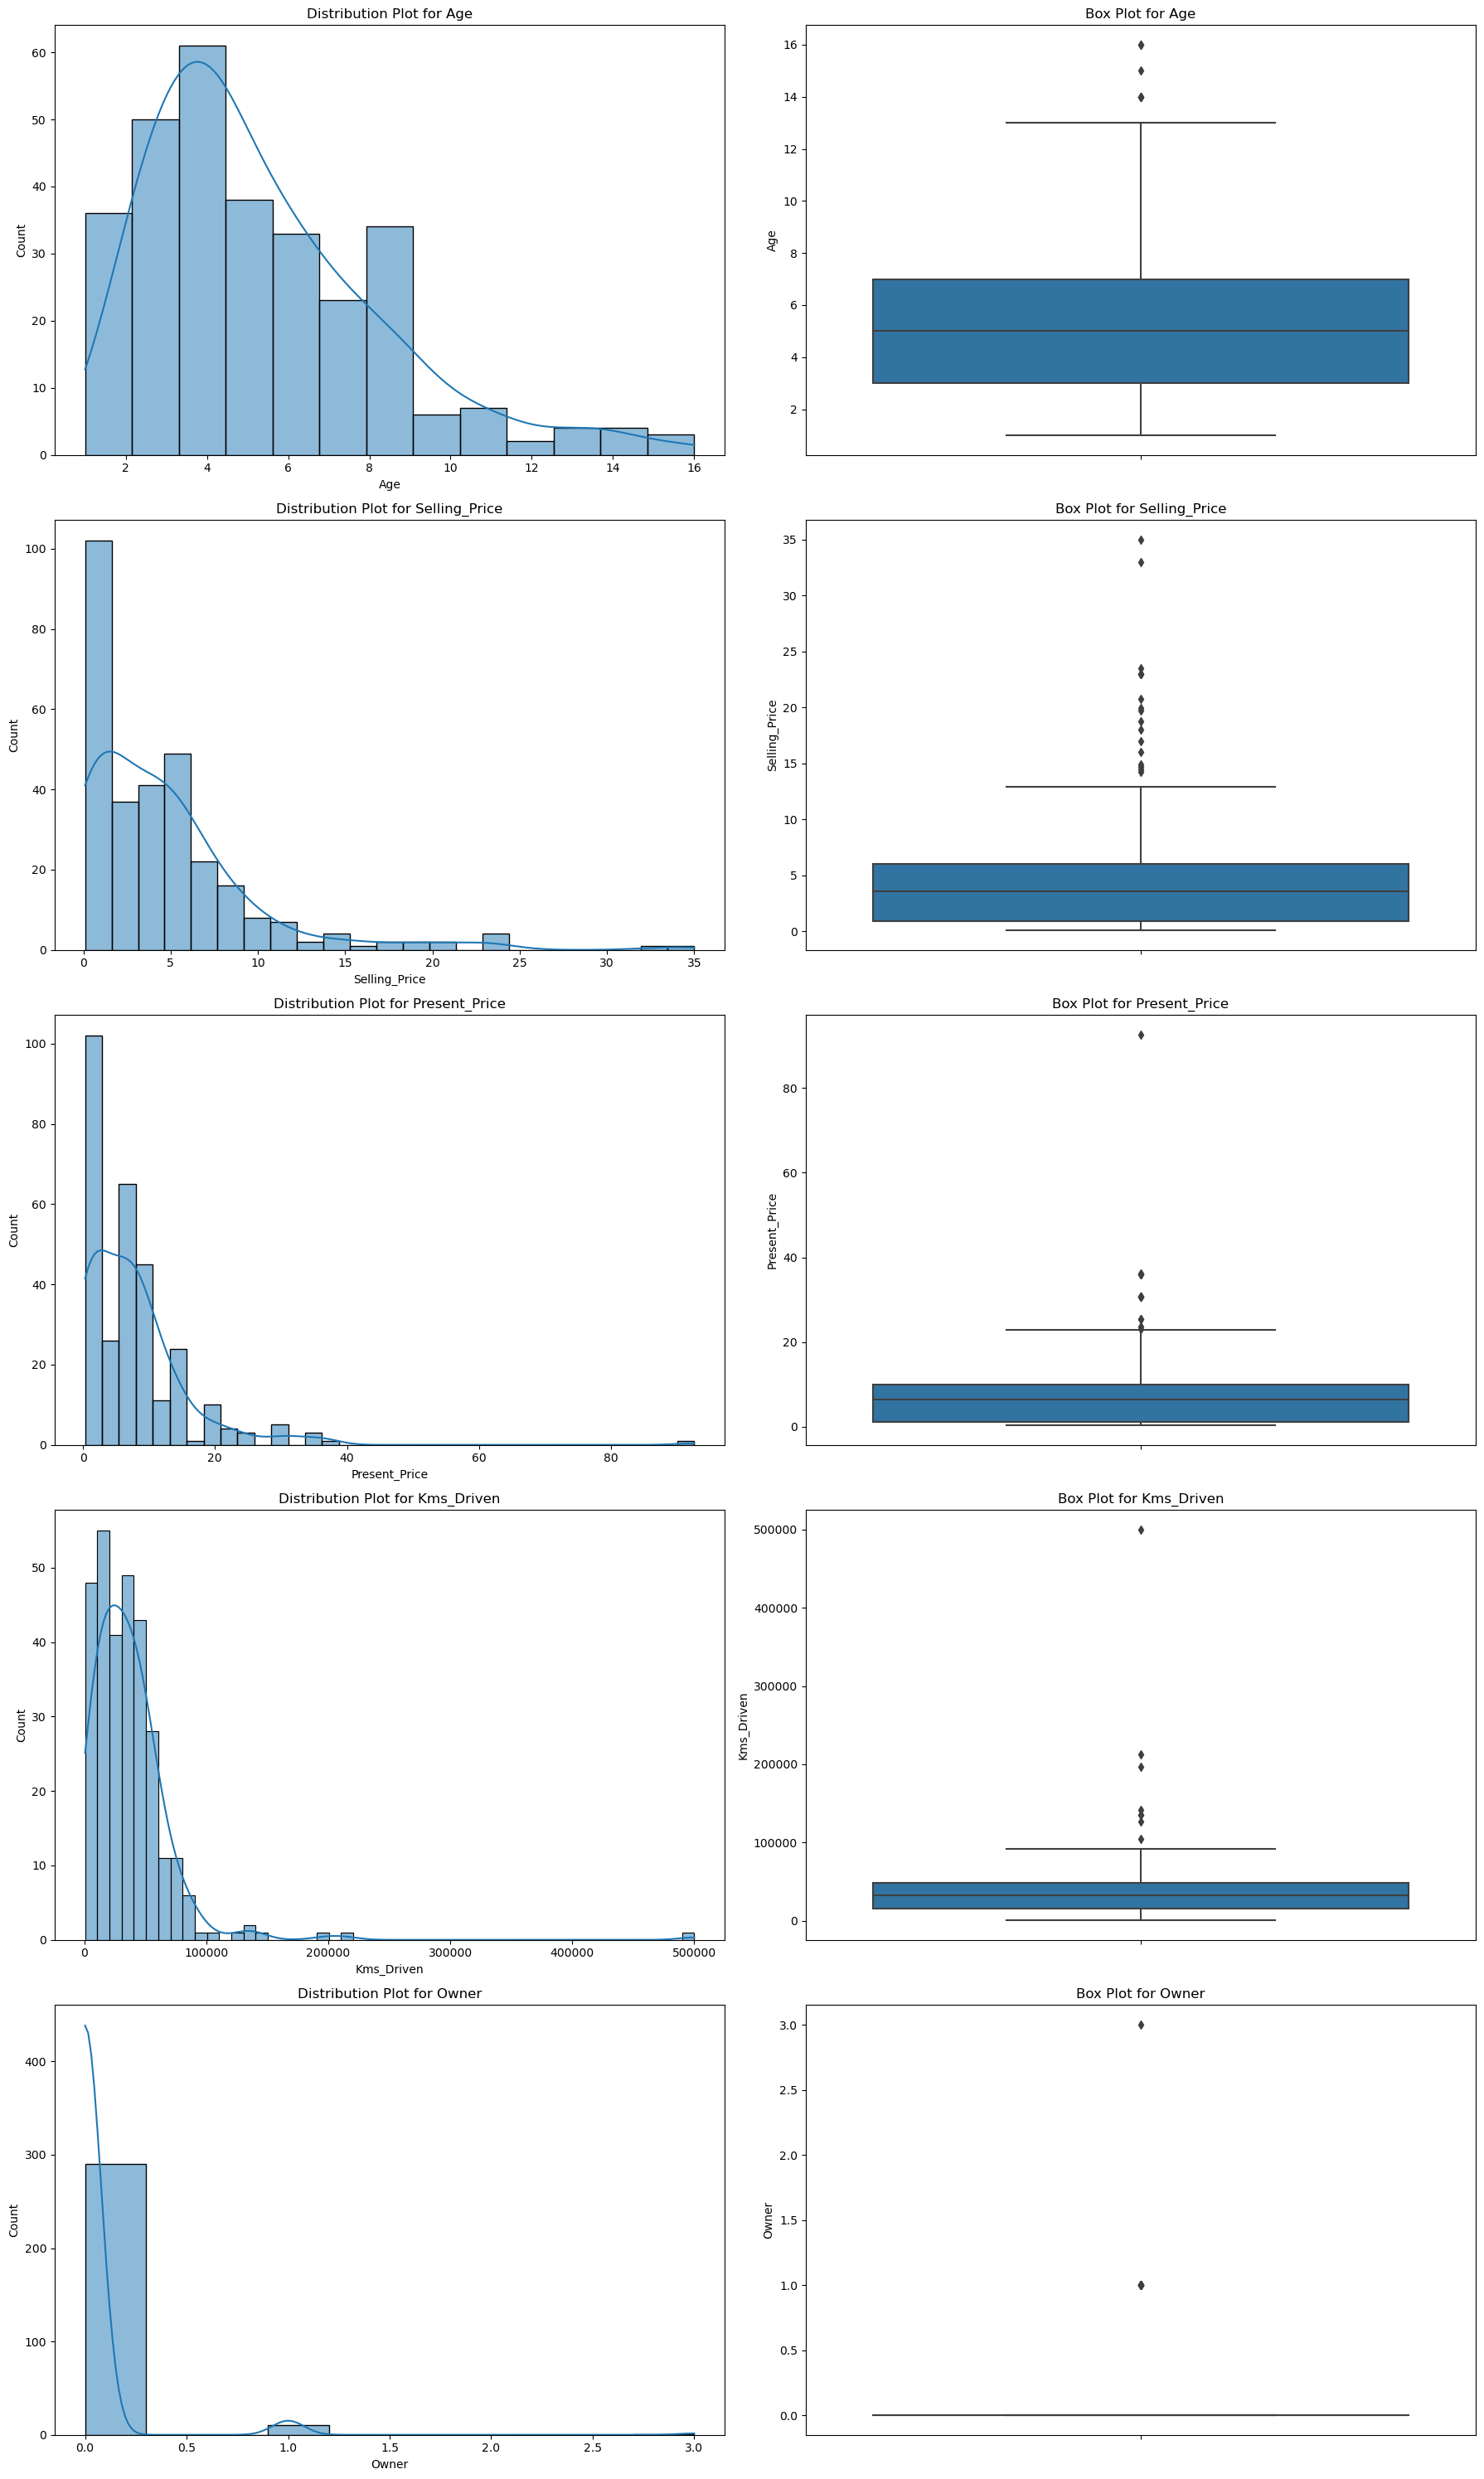

In [33]:
def plot_numerical_columns(df):
    # Get column names
    column_names = df.columns.to_list()
    
    numerical_list = [column_name for column_name in column_names if df[column_name].dtype in ['int64', 'float64']]
    object_list = [column_name for column_name in column_names if df[column_name].dtype == 'O']

    # Create a grid of subplots with 2 columns for each numerical column
    fig, axes = plt.subplots(nrows=len(numerical_list), ncols=2, figsize=(18, 6 * len(numerical_list)))

    # Plot histograms and box plots
    for i, column_name in enumerate(numerical_list):
        sns.histplot(df[column_name], kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'Distribution Plot for {column_name}')

        sns.boxplot(y=df[column_name], ax=axes[i, 1])
        axes[i, 1].set_title(f'Box Plot for {column_name}')

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()
    
#     Return numerical_list and object_list
    return numerical_list, object_list

# Assuming you have a DataFrame named 'dataSet'
numerical_list,object_list = plot_numerical_columns(dataSet)

In [34]:
df1 = pd.DataFrame(dataSet, columns=numerical_list)
df1

,Age,Selling_Price,Present_Price,Kms_Driven,Owner
0,5.0,3.35,5.590,27000,0
1,6.0,4.75,9.540,43000,0
2,2.0,7.25,9.850,6900,0
3,8.0,2.85,4.150,5200,0
4,5.0,4.60,6.870,42450,0
5,1.0,9.25,9.830,2071,0
6,4.0,6.75,8.120,18796,0
7,4.0,6.50,8.610,33429,0
8,3.0,8.75,8.890,20273,0
9,4.0,7.45,8.920,42367,0


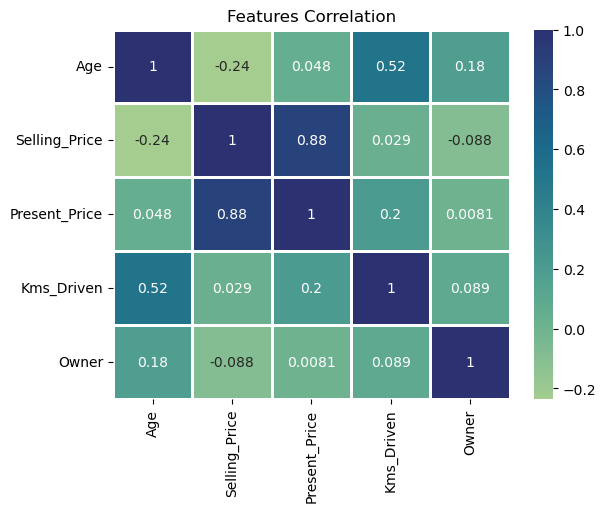

In [35]:
sns.heatmap(df1.corr(),annot=True,lw=1, linecolor='white', cmap="crest")
plt.title('Features Correlation')
plt.show()

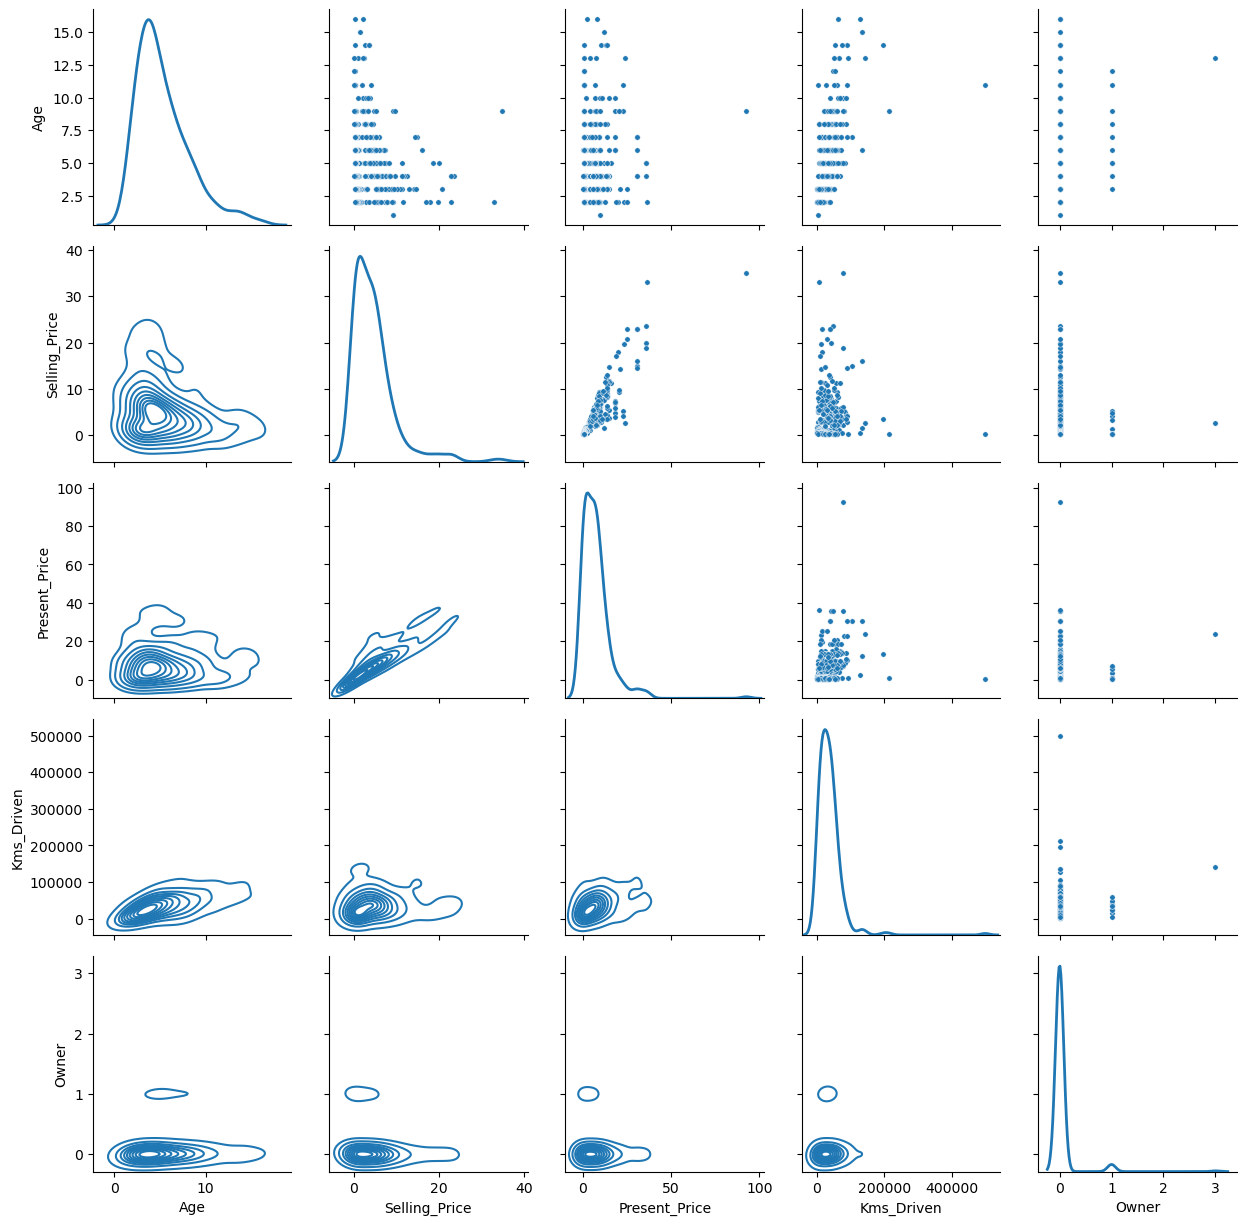

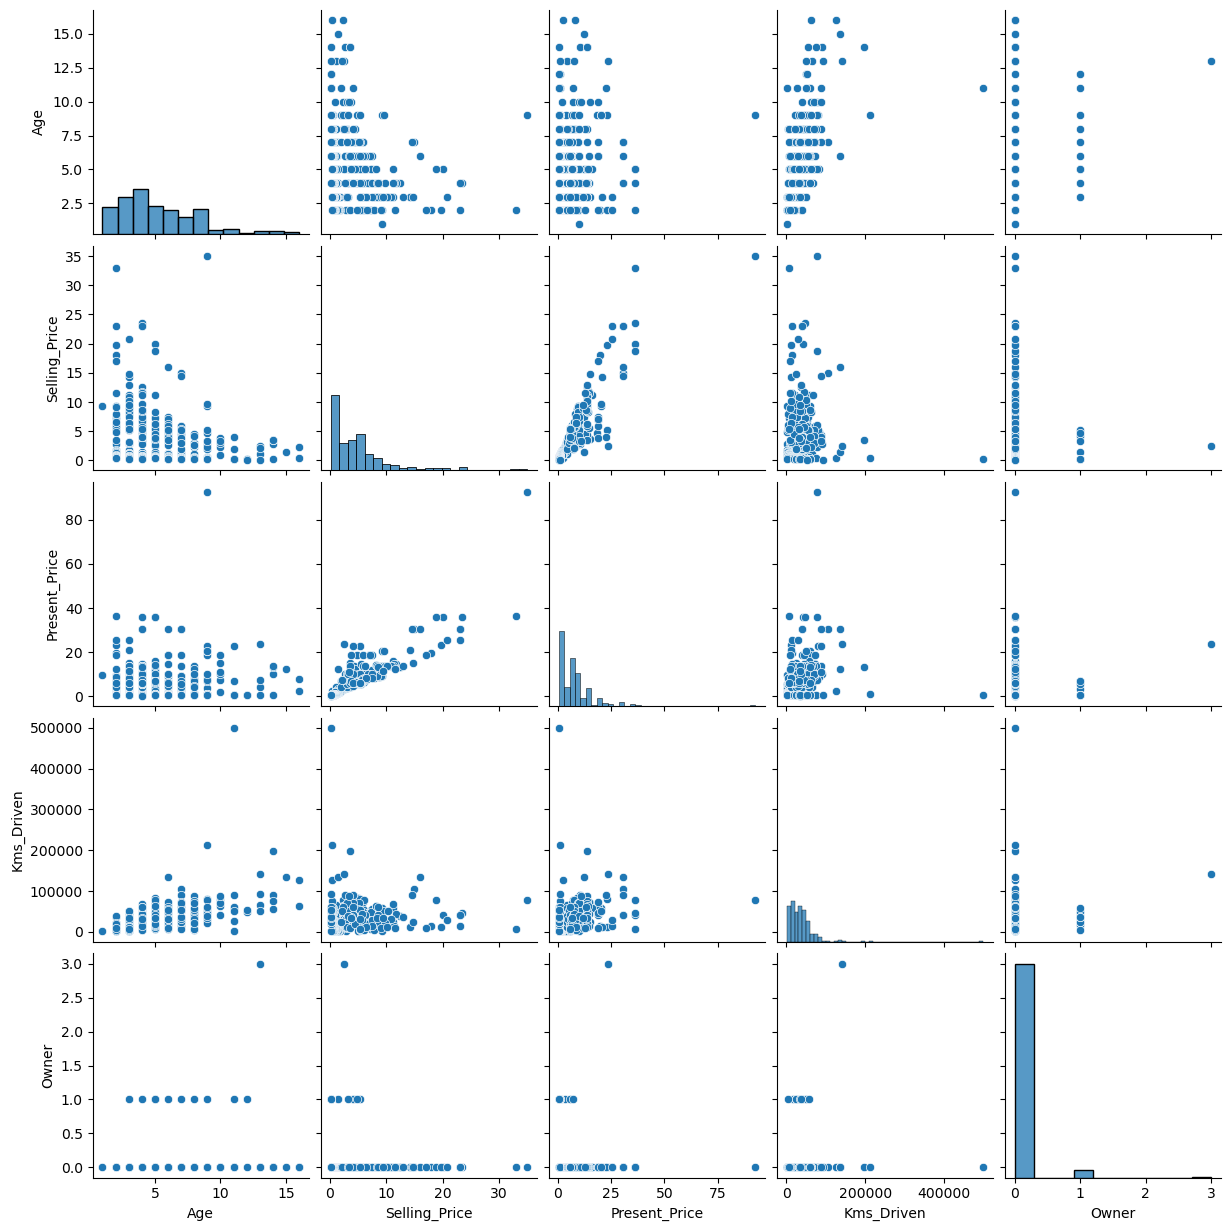

In [36]:
g = sns.PairGrid(df1, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)
sns.pairplot(df1)
plt.show()

In [37]:
dataSet['Fuel_Type'].replace({'Petrol':0, 'Diesel':1, 'CNG':2}, inplace=True)
dataSet['Seller_Type'].replace({'Dealer':0, 'Individual':1}, inplace=True)
dataSet['Transmission'].replace({'Manual':0, 'Automatic':1}, inplace=True)
dataSet

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5.0,3.35,5.590,27000,0,0,0,0
1,6.0,4.75,9.540,43000,1,0,0,0
2,2.0,7.25,9.850,6900,0,0,0,0
3,8.0,2.85,4.150,5200,0,0,0,0
4,5.0,4.60,6.870,42450,1,0,0,0
5,1.0,9.25,9.830,2071,1,0,0,0
6,4.0,6.75,8.120,18796,0,0,0,0
7,4.0,6.50,8.610,33429,1,0,0,0
8,3.0,8.75,8.890,20273,1,0,0,0
9,4.0,7.45,8.920,42367,1,0,0,0


In [38]:
X= pd.DataFrame(dataSet, columns=['Age','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner'])
y= dataSet['Selling_Price'].values.reshape(-1,1)

In [39]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
# fit scaler on training data
norm = MinMaxScaler().fit(x_train)
# transform training data
x_train_norm = norm.transform(x_train)
X_norm=norm.transform(X)
# transform testing data
x_test_norm = norm.transform(x_test)

In [49]:
display(LinearRegression())
model= LinearRegression()
# Train model
model.fit(x_train_norm, y_train)

# Test model
result= model.score(x_test_norm, y_test)
y_pred= model.predict(x_test_norm)
print(f'y_pred  :  \n\n',y_pred)

LinearRegression()

y_pred  :  

 [[ 7.15109403e+00]
 [-4.23597596e-01]
 [ 4.29317385e+00]
 [ 8.65452674e+00]
 [ 1.41567775e+01]
 [ 4.90831522e+00]
 [ 3.53467957e+00]
 [ 1.44629982e+00]
 [ 5.38203747e+00]
 [ 4.66822329e+00]
 [ 2.25436652e+00]
 [ 1.62369073e+00]
 [ 5.10340136e+00]
 [ 7.63583986e+00]
 [ 8.25142614e+00]
 [ 1.42107233e+01]
 [ 7.39937849e+00]
 [ 4.27934188e+00]
 [-4.57454953e-01]
 [ 2.39120792e+00]
 [ 5.03077854e+00]
 [ 3.81276384e+00]
 [ 6.49858604e+00]
 [ 8.14607684e+00]
 [-1.93080143e+00]
 [ 1.94357130e+00]
 [-8.19148942e-01]
 [ 8.21481213e-01]
 [ 2.20224230e-03]
 [ 7.20531002e+00]
 [ 3.07786554e+00]
 [ 7.05021502e+00]
 [ 7.21562252e-01]
 [ 7.54652493e+00]
 [ 3.56884281e+00]
 [ 1.81884781e+00]
 [ 5.60660404e+00]
 [ 6.59162587e+00]
 [-2.73350542e+00]
 [ 8.75806929e+00]
 [ 8.84199116e+00]
 [ 1.99052379e+01]
 [ 4.40391107e+00]
 [ 3.86694215e+00]
 [ 6.26329178e+00]
 [ 9.51709125e+00]
 [ 1.22523783e-01]
 [ 1.68957499e+00]
 [ 5.17960418e+00]
 [ 6.95950453e+00]
 [ 8.16014675e+00]
 [ 4.19806813e+00

In [50]:
print('Mean Absolute Error: \n', metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print('Mean Squared Error:\n', metrics.mean_squared_error(y_test, y_pred))
print("\n")
print('Root Mean Absolute Error: \n', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
print("\n")
print('R2 score:\n', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 
 1.0000326012144798


Mean Squared Error:
 2.188556445657235


Root Mean Absolute Error: 
 1.0000163004743872


R2 score:
 0.9134181721224686


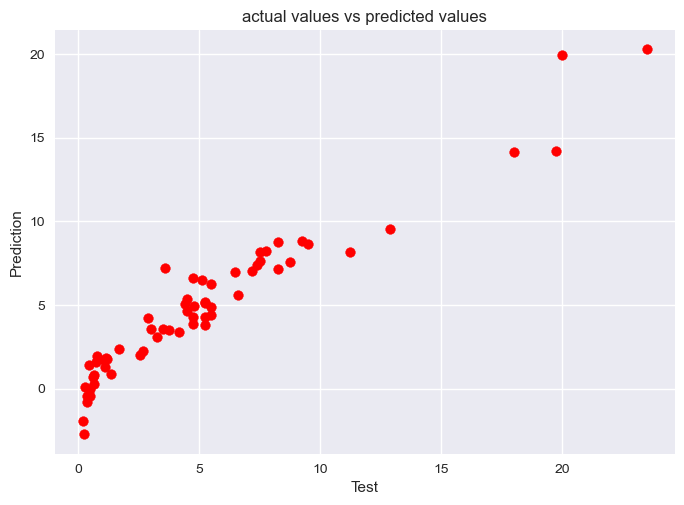

In [51]:
plt.style.use('seaborn')
plt.scatter(y_test, y_pred, color='red')
plt.xlabel ("Test")
plt.ylabel ("Prediction")
plt.title("actual values vs predicted values")
plt.show()

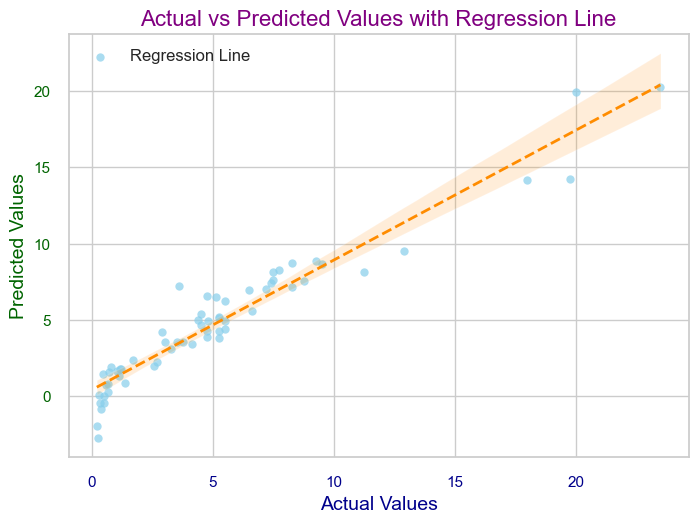

In [52]:
# Set Seaborn style
sns.set(style='whitegrid', palette='husl')

# Create a scatter plot with a regression line
sns.regplot(
    x=y_test,
    y=y_pred,
    scatter_kws={'color': 'skyblue', 'alpha': 0.7},
    line_kws={'color': 'darkorange', 'linestyle': '--', 'linewidth': 2}
)

# Add labels and title
plt.xlabel("Actual Values", fontsize=14, color='darkblue')
plt.ylabel("Predicted Values", fontsize=14, color='darkgreen')
plt.title("Actual vs Predicted Values with Regression Line", fontsize=16, color='purple')

# Add a legend
plt.legend(['Regression Line'], loc='upper left', fontsize=12)

# Customize the tick colors
plt.tick_params(axis='x', colors='darkblue')
plt.tick_params(axis='y', colors='darkgreen')

# Show the plot
plt.show()


## Lasso Regression

In [75]:
lasso_model = linear_model.Lasso()

In [76]:
lasso_model = lasso_model.fit(x_train,y_train)

In [95]:
Y_pred = lasso_model.predict(x_test)

In [96]:
Y_pred

array([ 5.70788028,  0.55939927,  4.0954068 ,  7.27347893, 11.74944408,
        4.65313154,  3.64963557,  1.99248315,  3.97578081,  4.93764281,
        2.33117571,  2.19393938,  4.73897606,  6.25743175,  6.81694681,
       13.45038279,  5.85068828,  4.22023846,  0.52475541,  2.92796144,
        3.85579067,  4.53199473,  5.24497302,  8.33430827, -0.73003401,
        2.41996961,  0.12099672,  1.56241529,  0.90616371,  6.60569856,
        2.89409923,  5.729246  ,  1.44913508,  6.01248128,  4.10827177,
        2.41696539,  5.44812198,  5.06885725, -0.52354232,  7.67194758,
        7.20516404, 18.69879559,  4.21800212,  4.73680894,  4.83473572,
        8.25375829,  0.90746318,  2.26966709,  5.38341116,  5.48576203,
        6.99120923,  3.84731044,  5.09895304, 18.97028127,  2.36048384,
        1.9890907 ,  1.0951713 ,  2.0374223 ,  3.37889209,  2.72103851,
        4.67892492])

In [97]:
len(y_test),len(Y_pred)

(61, 61)

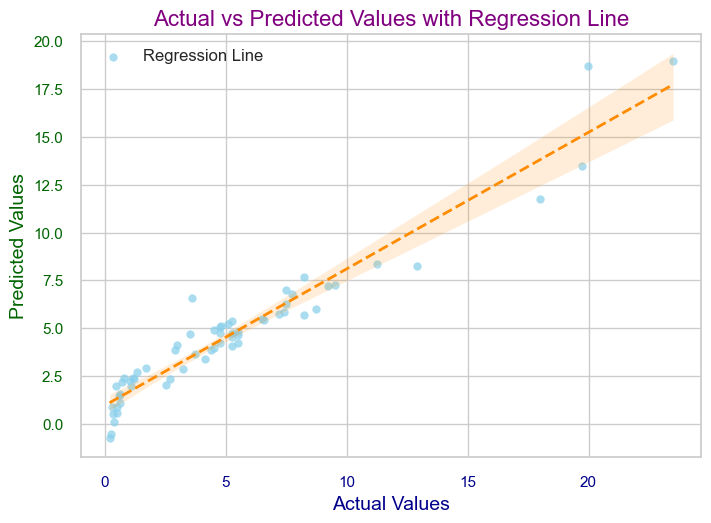

In [98]:
# Set Seaborn style
sns.set(style='whitegrid', palette='husl')

# Create a scatter plot with a regression line
sns.regplot(
    x=y_test,
    y=y_pred,
    scatter_kws={'color': 'skyblue', 'alpha': 0.7},
    line_kws={'color': 'darkorange', 'linestyle': '--', 'linewidth': 2}
)

# Add labels and title
plt.xlabel("Actual Values", fontsize=14, color='darkblue')
plt.ylabel("Predicted Values", fontsize=14, color='darkgreen')
plt.title("Actual vs Predicted Values with Regression Line", fontsize=16, color='purple')

# Add a legend
plt.legend(['Regression Line'], loc='upper left', fontsize=12)

# Customize the tick colors
plt.tick_params(axis='x', colors='darkblue')
plt.tick_params(axis='y', colors='darkgreen')

# Show the plot
plt.show()

In [102]:
print('Mean Absolute Error: \n', metrics.mean_absolute_error(y_test, Y_pred))
print("\n")
print('Mean Squared Error:\n', metrics.mean_squared_error(y_test, Y_pred))
print("\n")
print('Root Mean Absolute Error: \n', np.sqrt(metrics.mean_absolute_error(y_test, Y_pred)))
print("\n")
print('R2 score:\n', metrics.r2_score(y_test, Y_pred))  

Mean Absolute Error: 
 1.272021405273981


Mean Squared Error:
 3.3376977934056162


Root Mean Absolute Error: 
 1.1278392639352388


R2 score:
 0.8679568094168675
